In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [20]:
ROOT_DIR = "../../output/20240811/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] losses:  [0.12042793081038528, 0.12040656415435175, 0.12041250891052187, 0.12039914477823509, 0.12038067469580306, 0.12039408160684009, 0.1203816007822752, 0.1203692060481343, 0.12040837406077319, 0.1204148339573294, 0.12039905859467884, 0.12037463701951007, 0.12037618772851097, 0.12038687670913835, 0.1203967597335577, 0.12040618643061154, 0.12038424901353816, 0.12034397155770825, 0.12034014248703089, 0.12033386796247214, 0.12038187201962702, 0.12036866467549569, 0.12033461538764338, 0.12032946427611427, 0.12037749720426898, 0.12034259712220066, 0.12036981232102133, 0.12035948393555979, 0.12036237858442797, 0.12035382967959675, 0.12032993944465287, 0.12036699509351617]
min_loss_id:  23
min_loss:  0.12032946427611427
min_plot_id:  25


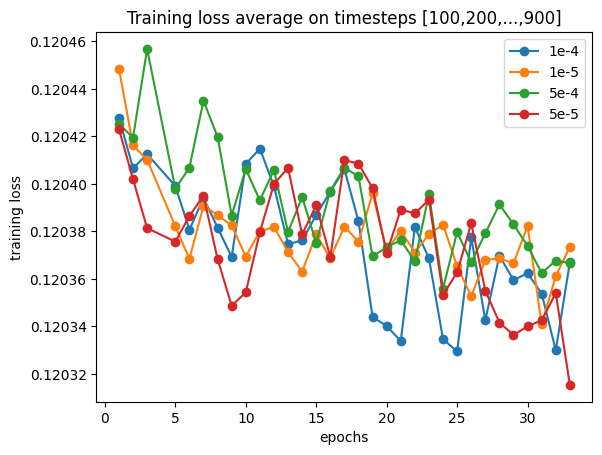

In [23]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk",""))+1)
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    #plt.ylim([0.13150, 0.13165])
    plt.ylabel("training loss")
    plt.title("Training loss average on timesteps [100,200,...,900]")